In [71]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time

In [2]:
with open("bonanza_buyer_item_seller_id_R_2.txt", "r") as f:
    df1 = f.readlines()


with open("ebid_buyer_item_seller_id_R_2.txt", "r") as f:
    df2 = f.readlines()

g1 = nx.Graph()
g2 = nx.Graph()

# loop through the lines in the first dataset

for i in df1:
    transaction_info = i.strip().split("::")
    buyer = transaction_info[0]
    item = transaction_info[1]
    seller = transaction_info[2]

    g1.add_node("Bon_"+buyer, type='buyer')
    g1.add_node("Bon_"+seller, type='seller')
    g1.add_node("Bon_"+item, type='item')
    
    g1.add_edge("Bon_"+buyer, "Bon_"+item, relation='buys')
    g1.add_edge("Bon_"+item, "Bon_"+seller, relation='sold_by')

In [3]:
# loop through the lines in the second dataset
for i in df2:
    transaction_info = i.strip().split("::")
    buyer = transaction_info[0]
    item = transaction_info[1]
    seller = transaction_info[2]

    g2.add_node("Eb_"+buyer, type='buyer')
    g2.add_node("Eb_"+seller, type='seller')
    g2.add_node("Eb_"+item, type='item')

    g2.add_edge("Eb_"+buyer, "Eb_"+item, relation='buys')
    g2.add_edge("Eb_"+item, "Eb_"+seller, relation='sold_by')


In [ ]:
# merge the two graphs into a single graph
#graph = nx.union(g1, g2)

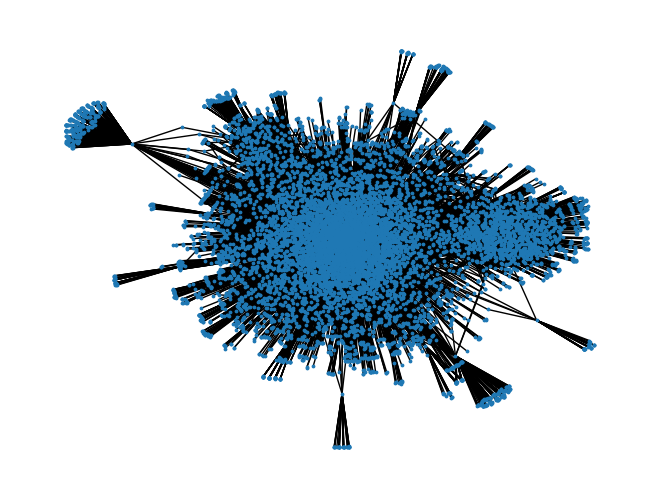

In [12]:
pos = nx.spring_layout(g1)
# draw the graph with the specified layout
nx.draw(g1, pos=pos, with_labels=False, node_size = 3)
plt.show()

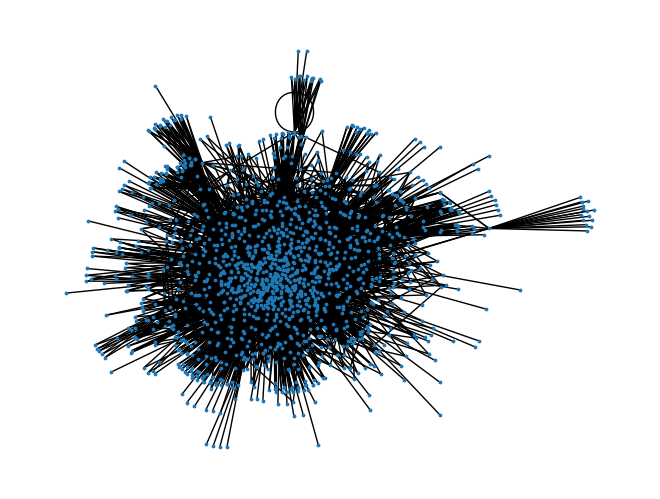

In [13]:
pos = nx.spring_layout(g2)
nx.draw(g2, pos=pos, with_labels=False, node_size = 3)
plt.show()

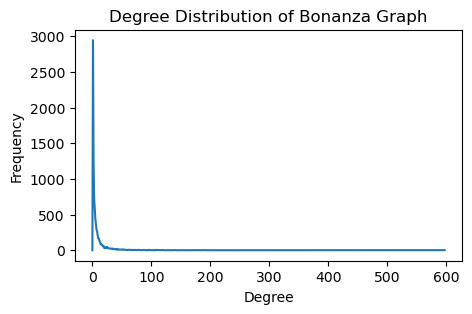

In [85]:
# Get the degree distribution from the graph
degree_hist_g1 = nx.degree_histogram(g1)
# plot the degree distribution
plt.figure(figsize=(5,3))
plt.plot(list(range(len(degree_hist_g1))), degree_hist_g1)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Bonanza Graph')
plt.show()

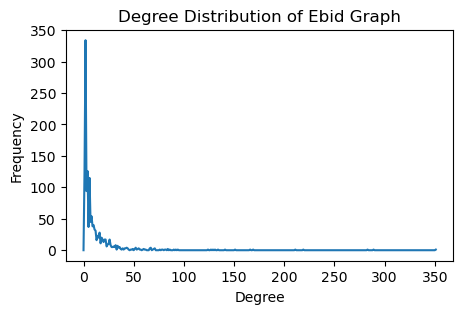

In [86]:
degree_hist_g2 = nx.degree_histogram(g2)

# plot the degree distribution
plt.figure(figsize=(5,3))
plt.plot(list(range(len(degree_hist_g2))), degree_hist_g2)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Ebid Graph')
plt.show()

In [74]:
def graph_statistics(G):
    print('Number of Nodes: ', G.number_of_nodes())
    print('Number of Edges: ', G.number_of_edges())
    print('Density: ', nx.density(G))
    print('Average local clustering coefficient: ', nx.average_clustering(G))
    totalnodes = G.number_of_nodes()
    dc = nx.degree_centrality(G).values()
    cc = nx.closeness_centrality(G).values()
    bc = nx.betweenness_centrality(G).values()
    ec = nx.eigenvector_centrality(G).values()
    print('Average Degree centrality: ', sum(dc)/totalnodes)
    print('Average Betweenness centrality: ', sum(bc)/totalnodes)
    print('Average Eigenvector centrality: ', sum(ec)/totalnodes)
    print('Average Closeness centrality: ', sum(cc)/totalnodes)
    print('Pearson Correlation between Closeness and Betweenness Centrality: ', sp.stats.pearsonr(list(cc), list(bc)))
    print('Pearson Correlation between Betweenness and Eigenvector Centrality: ', sp.stats.pearsonr(list(bc), list(ec)))
    print('Pearson Correlation between Eigenvector and Closeness Centrality: ', sp.stats.pearsonr(list(ec), list(cc)))
    print('Average Shortest Path Length: ', nx.average_shortest_path_length(nx.path_graph(G)))

In [87]:
#Bonanza Graph
t = time.time()
graph_statistics(g1)
t2 = time.time()
print('Time in Minutes: ', (t2 - t)/60)

Number of Nodes:  8922
Number of Edges:  40742
Density:  0.0010237562870036498
Average local clustering coefficient:  0.019015337875993604
Average Degree centrality:  0.0010237562870034549
Average Betweenness centrality:  0.0003193139781634166
Average Eigenvector centrality:  0.003785521971887392
Average Closeness centrality:  0.26346214731475665
Pearson Correlation between Closeness and Betweenness Centrality:  PearsonRResult(statistic=0.2906047742606331, pvalue=3.65203070706239e-173)
Pearson Correlation between Betweenness and Eigenvector Centrality:  PearsonRResult(statistic=0.5448322679535171, pvalue=0.0)
Pearson Correlation between Eigenvector and Closeness Centrality:  PearsonRResult(statistic=0.6831700585832972, pvalue=0.0)
Average Shortest Path Length:  2974.3333333333335
Time in Minutes:  11.473435163497925


In [77]:
#Ebid Graph
t = time.time()
graph_statistics(g2)
t2 = time.time()
print('Time in Minutes: ', (t2 - t)/60)

Number of Nodes:  1432
Number of Edges:  8548
Density:  0.008342800479408469
Average local clustering coefficient:  0.13840105590639756
Average Degree centrality:  0.008342800479408462
Average Betweenness centrality:  0.0014987902992540814
Average Eigenvector centrality:  0.013623187032436954
Average Closeness centrality:  0.32406340063080163
Pearson Correlation between Closeness and Betweenness Centrality:  PearsonRResult(statistic=0.43139408490378217, pvalue=5.571580639848613e-66)
Pearson Correlation between Betweenness and Eigenvector Centrality:  PearsonRResult(statistic=0.7180181814100616, pvalue=2.634589580687784e-227)
Pearson Correlation between Eigenvector and Closeness Centrality:  PearsonRResult(statistic=0.7966818328112046, pvalue=5.195185403e-315)
Average Shortest Path Length:  477.6666666666667
0.23562315305074055
